###  print out structures

In [1]:
import random
import numpy as np
import pprint
from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)


#### Neuron

number of inputs:  1
Neuron:  LinearNeuron(1)
weights:  [Value(name=val1,neuronnumber=n,weightnumber=,type=w1,data=0.5, grad=0)]
b:  Value(name=val2,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)
b type:  b
number of parameters  2
parameters
[   Value(name=val1,neuronnumber=n,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=val2,neuronnumber=n,weightnumber=,type=b,data=0, grad=0)]
inputs  [Value(name=val3,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
number of Value objects created =  5
activation:  Value(name=val5,neuronnumber=n,weightnumber=,type=a,data=0.5, grad=0)


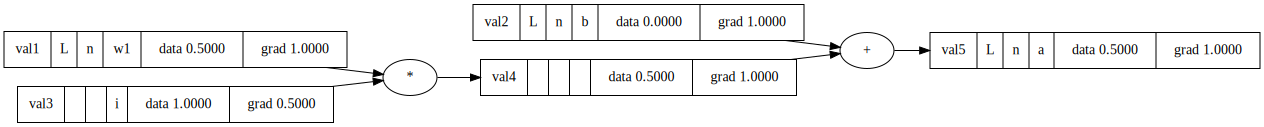

In [2]:
nin=1  #number of inputs
nonlin=False
Value.value_counter=0

myNeuron=Neuron(nin,nonlin=nonlin, weightsinit=2)
print("number of inputs: ",nin)
print("Neuron: ",myNeuron)
print("weights: ",myNeuron.w)
print("b: ",myNeuron.b)
print("b type: ",myNeuron.b.type)
print("number of parameters ", len(myNeuron.parameters()))
print("parameters")
pp.pprint(myNeuron.parameters())

# xinumbers= np.random.randint(1,10, size=(nin))   # inputs
xinumbers = list(range(1, nin+1))
xinput = [Value(x,type='i') for x in xinumbers]
print("inputs ", xinput)

activation=myNeuron(xinput)
print("number of Value objects created = ",Value.value_counter)

print("activation: ",activation)
activation.backward()
draw_dot(activation)

## Gradient

[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.1, grad=0),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=w2,data=0.2, grad=0),
    Value(name=val3,neuronnumber=n1,weightnumber=,type=w3,data=0.30000000000000004, grad=0),
    Value(name=val4,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]
[   Value(name=val5,neuronnumber=n2,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=val6,neuronnumber=n2,weightnumber=,type=w2,data=1.0, grad=0),
    Value(name=val7,neuronnumber=n2,weightnumber=,type=w3,data=1.5000000000000002, grad=0),
    Value(name=val8,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0)]
inputs1
[   Value(name=val9,neuronnumber=,weightnumber=,type=i,data=1, grad=0),
    Value(name=val10,neuronnumber=,weightnumber=,type=i,data=2, grad=0),
    Value(name=val11,neuronnumber=,weightnumber=,type=i,data=3, grad=0)]
activation1  Value(name=val17,neuronnumber=n1,weightnumber=,type=a,data=1.4000000000000001, grad=0)
inputs2
[   Value(name=val18,neur

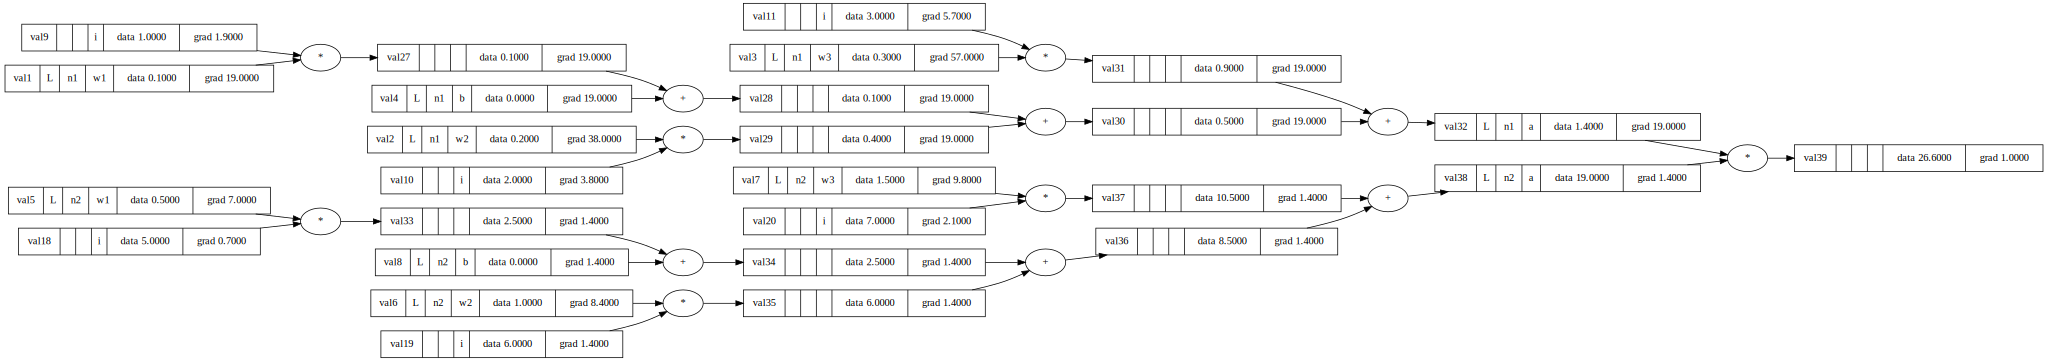

In [4]:
nin = 3  # number of inputs
Value.value_counter = 0
nonlin = False

myNeuron1 = Neuron(nin, neuronnumber="n1", nonlin=nonlin, weightsinit=1)
myNeuron2 = Neuron(nin, neuronnumber="n2", nonlin=nonlin, weightsinit=2)
pp.pprint(myNeuron1.parameters())
pp.pprint(myNeuron2.parameters())

xinumbers1 = list(range(1, nin + 1))
xinput1 = [Value(x, type="i") for x in xinumbers1]
print("inputs1")
pp.pprint(xinput1)

activation1 = myNeuron1(xinput1)
print("activation1 ", activation1)

xinumbers2 = list(range(5, 5+nin ))
xinput2 = [Value(x, type="i") for x in xinumbers2]
print("inputs2")
pp.pprint(xinput2)

activation2 = myNeuron2(xinput2)
print("activation2 ", activation2)

loss = myNeuron1(xinput1) * myNeuron2(xinput2)
print("number of Value objects created = ", Value.value_counter)

print("loss=", loss)

loss.backward()

draw_dot(loss)